In [1]:
from settings import *

import os
import json
import glob
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.metrics import accuracy_score
from data import *
from utils import *

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:

def calculate_tag_accuracy(json_file, tag_dict):
    with open(json_file, 'r') as f:
        data = json.load(f)

    idx_to_tag = {v: k for k, v in tag_dict.items()}
    tag_accuracies = {}
    for _, entry in data.items():
        pred_idx = entry['pred_idx']
        true_idx = entry['true_idx']
        for pred, true in zip(pred_idx, true_idx):
            true_tag = idx_to_tag[true]
            pred_tag = idx_to_tag[pred]
            if true_tag not in tag_accuracies:
                tag_accuracies[true_tag] = {'correct': 0, 'total': 0}
            tag_accuracies[true_tag]['total'] += 1
            if pred_tag == true_tag:
                tag_accuracies[true_tag]['correct'] += 1

    avg_accuracies = {tag: data['correct'] / data['total'] for tag, data in tag_accuracies.items()}
    return avg_accuracies

def result_tag_analysis(system_type):
    system_name = 'A' if system_type == 'ALL' else 'B'
    tag_dict = ALL_TAGS if system_type == 'ALL' else SELECTED_TAGS
    pattern = '**/*' + system_type + '*/*tags.json'
    tags_files = glob.glob(os.path.join(RESULT, pattern), recursive=True)
    print('files:', tags_files)
    
    combined_accuracies = {}
    for json_file in tags_files:
        tag_accuracies = calculate_tag_accuracy(json_file, tag_dict)
        for tag, acc in tag_accuracies.items():
            if tag not in combined_accuracies:
                combined_accuracies[tag] = []
            combined_accuracies[tag].append(acc)

    avg_combined_accuracies = {tag: sum(accs) / len(accs) for tag, accs in combined_accuracies.items()}

    sorted_tags = sorted(avg_combined_accuracies.items(), key=lambda x: x[1], reverse=True)
    print(f"{'Tag':<15}{'Average Accuracy':<15}")
    for tag, accuracy in sorted_tags:
        print(f"{tag:<15}{accuracy:<15.4f}")
    tags, accuracies = zip(*sorted_tags)
    plt.figure(figsize=(9, 5))
    plt.barh(tags, accuracies, color='skyblue')
    plt.xlabel('Average Accuracy')
    plt.title(f'Average Accuracy of Tags in {system_name} System')
    plt.gca().invert_yaxis()
    plt.show()

files: ['/Users/yangching18/Desktop/MultiNERD_repo/result/BertNERLSTM_ALL_0.8297/tags.json', '/Users/yangching18/Desktop/MultiNERD_repo/result/BertNEROriginal_ALL_0.8391/tags.json']
Tag            Average Accuracy
I-PER          0.9980         
B-PER          0.9938         
O              0.9900         
B-LOC          0.9863         
I-EVE          0.9811         
I-ORG          0.9800         
I-MEDIA        0.9777         
B-ORG          0.9747         
I-LOC          0.9735         
B-MEDIA        0.9723         
B-EVE          0.9689         
B-TIME         0.8750         
B-BIO          0.8667         
I-VEHI         0.8654         
B-CEL          0.8558         
B-MYTH         0.8519         
B-VEHI         0.8455         
I-TIME         0.8268         
B-INST         0.8250         
B-DIS          0.8244         
B-ANIM         0.7900         
I-DIS          0.7828         
I-ANIM         0.7687         
I-CEL          0.7500         
B-PLANT        0.7263         
I-FOOD     

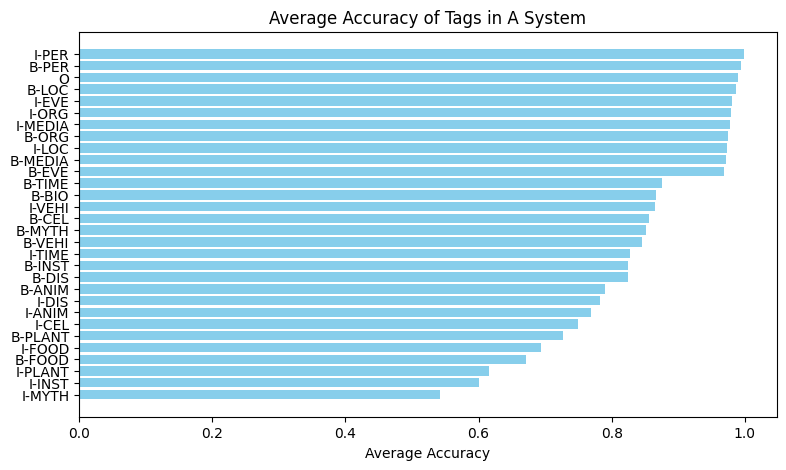

In [8]:
result_tag_analysis('ALL')

files: ['/Users/yangching18/Desktop/MultiNERD_repo/result/BertNERLSTM_FILTERED_0.8976/tags.json', '/Users/yangching18/Desktop/MultiNERD_repo/result/BertNEROriginal_FILTERED_0.8979/tags.json']
Tag            Average Accuracy
I-PER          0.9985         
B-PER          0.9942         
O              0.9931         
B-LOC          0.9871         
I-ORG          0.9789         
B-ORG          0.9741         
I-LOC          0.9733         
B-DIS          0.8293         
I-DIS          0.7995         
B-ANIM         0.7840         
I-ANIM         0.7827         


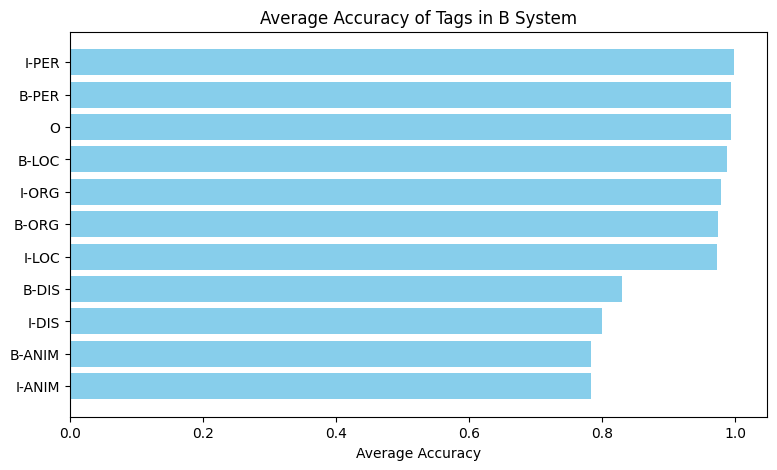

In [9]:
result_tag_analysis('FILTERED')
